<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%205/DNN_Optimizedv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# install and import keras for neural network design and implementation

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# import keras objects for Convolution and import the dataset

### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# load the datset into train and test sets

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


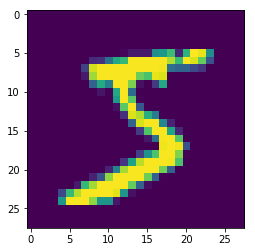

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# plotting a sample as image to get a visual feel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# reshaping the dataset to Convolution format, X_train.shape[0] --> # of images, (28, 28) --> input image resolution, 1 - # of channels(the image itself).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# converting the values into greyscale values.

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
uniques, ids = np.unique(y_train, return_inverse=True)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Now we are going to optimize the network step by step to achieve max validation accuracy with less no. of parameters

# Good Network

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 22, 22, 16)        2320      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 191us/step - loss: 0.0323 - acc: 0.9893 - val_loss: 0.0280 - val_acc: 0.9911
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0264 - acc: 0.9914 - val_loss: 0.0268 - val_acc: 0.9924
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0232 - acc: 0.9926 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0199 - acc: 0.9936 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# validation score on test data

In [0]:
print(score)

[0.020153841206946528, 0.9945]


## Inference
Now we are able to achieve the validation accuracy of 99.43% at the 15th epoch, this model is able perform very good in-terms of validation accuracy and has only around ~12k paramters

## Implementing Image Normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

In [0]:
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)

In [49]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(Dropout(0.1))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_16 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


# Adding Weight Decay to total loss

In [0]:
import keras.backend as K

def loss_with_reg(model, batch_size, _lambda = 0.001):
  reg_loss_sqr = 0
  for layer in model.layers:
    if len(layer.get_weights()) > 0:
      reg_loss_sqr += np.sum(layer.get_weights()[0]**2)
  reg_loss_sqr = reg_loss_sqr * (_lambda/2*batch_size)
  
  def temp(y_true, y_pred):
    return K.categorical_crossentrophy(y_true, y_pred) + reg_loss_sqr
  return temp

In [0]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.003), metrics=['accuracy'])

In [52]:
loss_with_reg(model=model, batch_size=64)

<function __main__.loss_with_reg.<locals>.temp>

In [53]:
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, validation_data=test_iterator, callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
938/938 [==============================] - 23s 25ms/step - loss: 1.0705 - acc: 0.6594 - val_loss: 0.2965 - val_acc: 0.9122
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
938/938 [==============================] - 21s 22ms/step - loss: 0.2745 - acc: 0.9161 - val_loss: 0.1920 - val_acc: 0.9427
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
938/938 [==============================] - 21s 22ms/step - loss: 0.2079 - acc: 0.9356 - val_loss: 0.1682 - val_acc: 0.9491
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
938/938 [==============================] - 21s 22ms/step - loss: 0.1795 - acc: 0.9437 - val_loss: 0.1445 - val_acc: 0.9568
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
938/938 [==============================] - 21s 22ms/step - loss: 0.1618 - acc: 0.9502

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = uniques[y_pred.argmax(1)]

In [0]:
result = np.absolute(y_pred, y_test)

In [74]:
y_pred

array([1, 6, 1, ..., 4, 6, 6], dtype=uint8)

In [75]:
y_test

array([1, 6, 1, ..., 4, 6, 6], dtype=uint8)

In [0]:
result = y_pred - y_test

In [79]:
result[result > 0]

array([], dtype=uint8)

In [55]:
print(y_pred[:9])
print(y_test[:9])

# As we can see below the number indicating the class in each of the arrays listed below, is close to 1 and all the other numbers are far less than that

[[3.0103780e-02 5.5292839e-01 4.1684933e-02 3.9381793e-04 6.7190349e-02
  5.3466170e-05 8.7737637e-03 2.7841574e-01 6.4954474e-03 1.3960227e-02]
 [1.4976776e-01 9.8496661e-02 5.8535370e-03 4.4536835e-05 1.4297341e-01
  1.3127922e-04 5.9600627e-01 2.1813116e-04 5.6376858e-03 8.7072368e-04]
 [7.1392404e-03 7.7584833e-01 6.4662221e-04 8.7560138e-06 1.2552966e-01
  4.1214895e-05 8.6697616e-02 1.2339101e-03 2.1180008e-03 7.3665241e-04]
 [2.2056267e-01 1.8928992e-02 1.3051017e-03 3.5824464e-06 1.6643669e-01
  2.0989528e-05 5.8776450e-01 1.0980284e-03 1.5825871e-03 2.2968510e-03]
 [5.0486089e-03 8.2935445e-02 2.1813528e-04 1.1292489e-05 8.5523272e-01
  2.8117955e-05 4.8087161e-02 2.9180681e-03 5.0582498e-04 5.0146617e-03]
 [3.5657752e-03 8.4921014e-01 3.5416801e-04 4.3022260e-06 8.6776018e-02
  2.4620827e-05 5.7706315e-02 7.5971481e-04 1.2477664e-03 3.5118323e-04]
 [2.5770015e-03 5.0047487e-01 1.7758667e-03 3.5480924e-05 4.5635906e-01
  1.0070636e-04 2.0471212e-02 2.9281257e-03 7.4855220e-03 

In [0]:
import numpy as np

In [63]:
result = np.absolute(y_pred-y_test)

ValueError: ignored

In [62]:
result

array([[3.0103780e-02, 5.5292839e-01, 4.1684933e-02, ..., 7.2158426e-01,
        6.4954474e-03, 1.3960227e-02],
       [1.4976776e-01, 9.8496661e-02, 9.9414647e-01, ..., 2.1813116e-04,
        5.6376858e-03, 8.7072368e-04],
       [7.1392404e-03, 2.2415167e-01, 6.4662221e-04, ..., 1.2339101e-03,
        2.1180008e-03, 7.3665241e-04],
       ...,
       [1.1698172e-03, 2.0669070e-01, 6.9033755e-05, ..., 1.1854423e-03,
        5.8079086e-04, 1.0023918e-03],
       [6.0106024e-02, 2.1340562e-01, 1.0351893e-03, ..., 1.7857789e-03,
        6.5871272e-03, 5.7041687e-03],
       [5.5034328e-02, 2.4846183e-02, 1.7669224e-03, ..., 3.0172389e-04,
        4.3356663e-04, 1.1429824e-03]], dtype=float32)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Storing model architecture to a dictionary

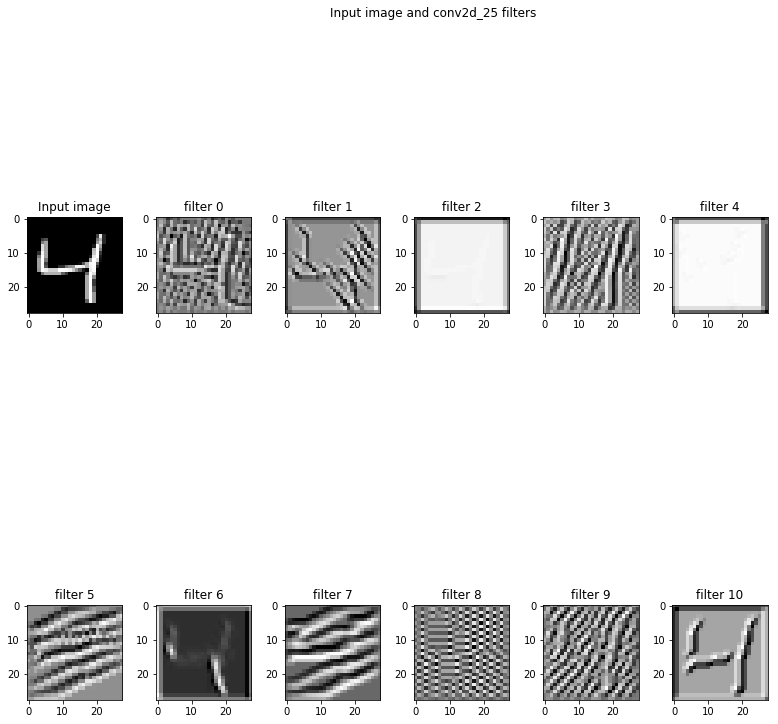

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_25'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()